# TEST pyBioPlot package
** This notebook contains tests for all function contained in pyBioPlot package **

In [1]:
# For ipythoninline ploting ploting
%matplotlib inline

# Larger display 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import of required packages
import pandas as pd

# import all function from pyBioPlot
from pyBioPlot import *

---
# RNASeq plots

## volcano_plot

In [2]:
help(volcano_plot)

Help on function volcano_plot in module pyBioPlot:

volcano_plot(df, X, Y, FDR=0.05, X_cutoff=1, sig_color='0.40', non_sig_color='0.70', highlight_list=[], **kwargs)
    Run a command line in the default shell and return the standard output
    @param  df  Panda dataframe containing the results. Each line corresponds to a single gene/transcript value. Gene/transcript are
                identified by a target_id column. The other covariate columns need to contain the values for X and Y plotting  
    @param  X   Name of the column for X plotting (usually log2FC)
    @param  Y   Name of the column for Y plotting (usually pvalue)
    @param  FDR false discovery rate cut-off for the Y axis (on the raw value before log transformation for plotting [DEFAULT: 0.05]
    @param  X_cutoff    value for significance cut-off for the X axis [DEFAULT: 1]
    @param  sig_color   Color of the significant points [DEFAULT: "0.40"] 
    @param  non_sig_color Color of the non-significant points [DEFAULT: "

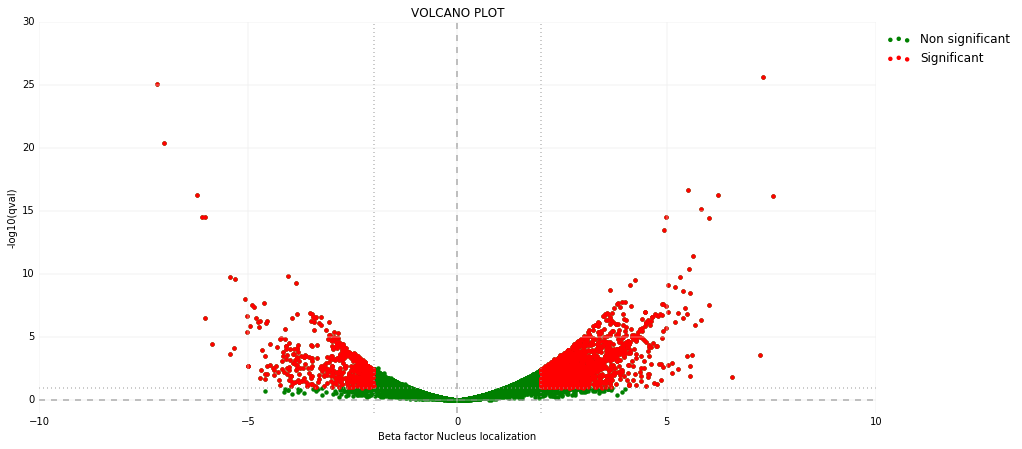

In [3]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
volcano_plot(df, "b", "qval", FDR=0.1, X_cutoff=2, figsize=[15,7], xlim=[-10,10], ylim=[-1, 30], sig_color="red",
             non_sig_color="green", title="VOLCANO PLOT", xlabel="Beta factor Nucleus localization")

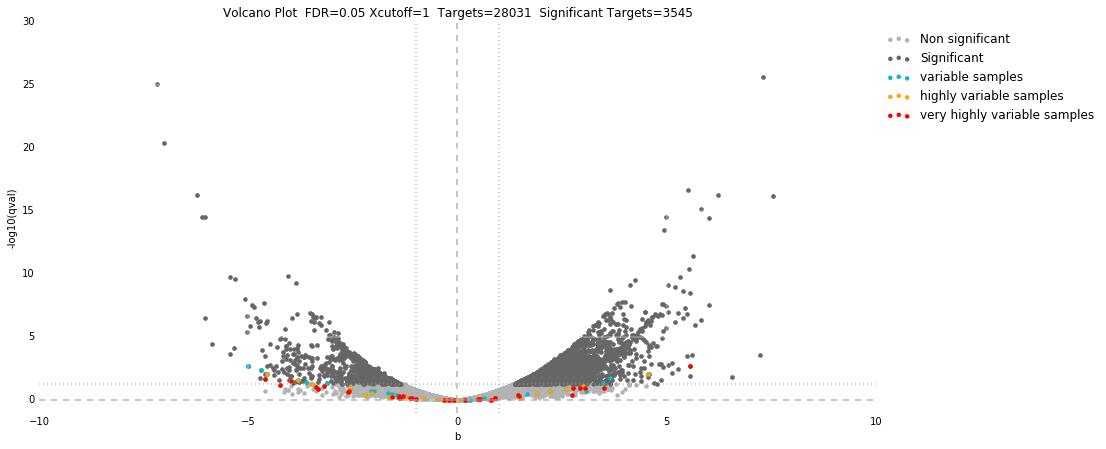

In [4]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
highlight_list = [
    {"target_id":df.target_id[(df.tech_var >= 1.2)], "label":"variable samples"},
    {"target_id":df.target_id[(df.tech_var >= 1.3)], "color":"orange", "label":"highly variable samples"},
    {"target_id":df.target_id[(df.tech_var >= 1.5)], "color":"red", "label":"very highly variable samples"}]

volcano_plot(df, "b", "qval", figsize=[15,7], xlim=[-10,10], ylim=[-1, 30], highlight_list= highlight_list,
             bg_color="black", grid_color="white")

## MA_plot

In [5]:
help(MA_plot)

Help on function MA_plot in module pyBioPlot:

MA_plot(df, X, Y, FDR=0.05, FDR_col='pval', sig_color='0.40', non_sig_color='0.70', highlight_list=[], **kwargs)
    Run a command line in the default shell and return the standard output
    @param  df  Panda dataframe containing the results. Each line corresponds to a single gene/transcript value. Gene/transcript are
                identified by a target_id column. The other covariate columns need to contain the values for X and Y plotting  
    @param  X   Name of the column for X plotting (usually Mean expression)
    @param  Y   Name of the column for Y plotting (usually log2FC)
    @param  FDR false discovery rate cut-off for the Y axis (on the raw value before log transformation for plotting [DEFAULT: 0.05]
    @param  FDR_col Name of the column to use to determine the significance cut-off (usually pvalue)
    @param  sig_color   Color of the significant points [DEFAULT: "0.40"] 
    @param  non_sig_color Color of the non-significa

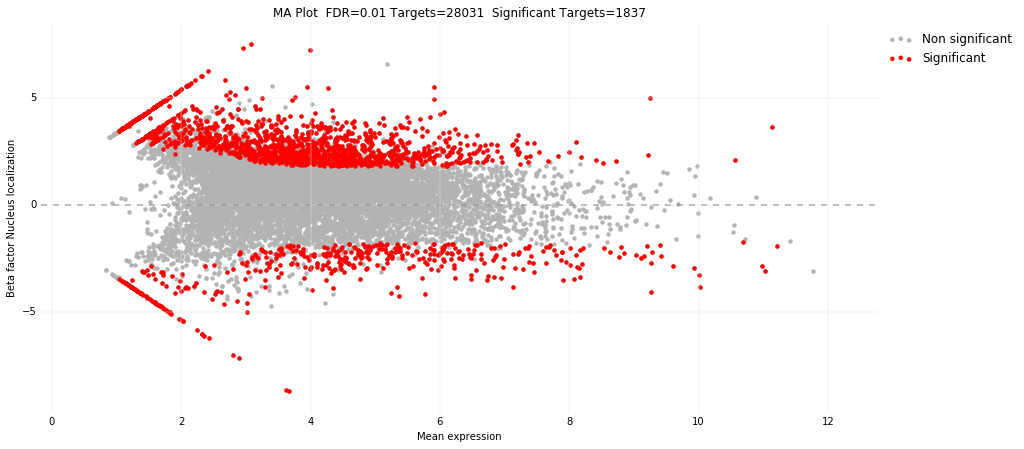

In [6]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
MA_plot(df, "mean_obs", "b", FDR=0.01, FDR_col="qval", figsize=[15,7], sig_color="red",
        xlabel="Mean expression",
        ylabel="Beta factor Nucleus localization")

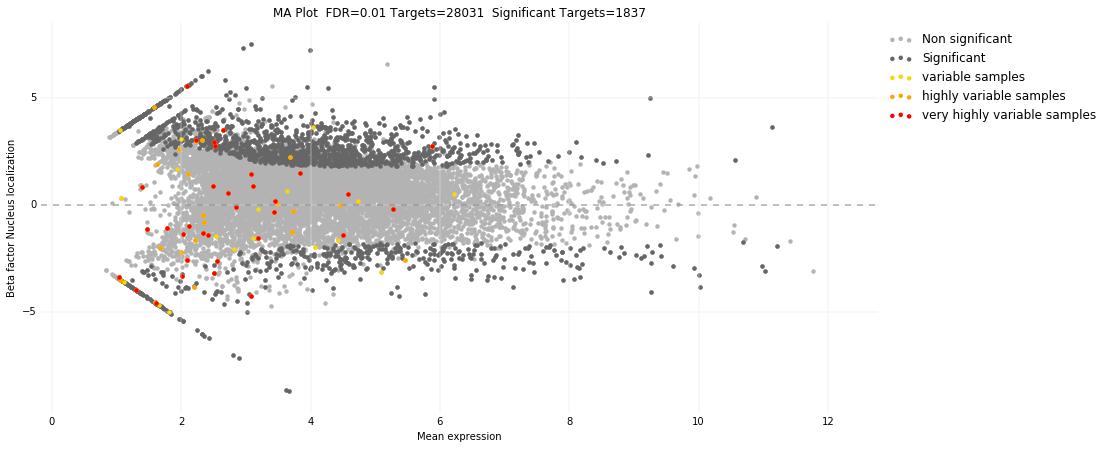

In [7]:
df = pd.read_table("./test_data/localizationnucleus_wald_test.tsv")
hl = [
    {"target_id":df.target_id[(df.tech_var >= 1.2)], "color":"gold", "label":"variable samples"},
    {"target_id":df.target_id[(df.tech_var >= 1.3)], "color":"orange", "label":"highly variable samples"},
    {"target_id":df.target_id[(df.tech_var >= 1.5)], "color":"red", "label":"very highly variable samples"}]

MA_plot(df, "mean_obs", "b", FDR=0.01, FDR_col="qval", highlight_list=hl,
        figsize=[15,7],
        xlabel="Mean expression",
        ylabel="Beta factor Nucleus localization")